In [2]:
import os
import time
import h5py
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def norm_01(x):
    return (x - x.min())/(x.max() - x.min())

label_colors = np.array([(0, 0, 0),
            (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
            (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
            (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
            (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

labels_names = ["bg","jet","bike","bird","boat","jar","bus",
        "car","cat","chair","cow","table","dog","horse",
        "motor","person","plant","sheep","sofa","train","tv"]

def sub_plot(fig, rows, cols, index, title, image):
    axis = fig.add_subplot(rows, cols, index)
    if title != None:
        axis.title.set_text(title)
    axis.axis('off')
    plt.imshow(image)

['000', '001', '002', '003', '004', '005', '006']


In [4]:
fp_h5 = h5py.File('pitts30k_train.h5', 'r')
print(list(fp_h5.keys()))
print(list(fp_h5['001'].keys())[0:3])

['000', '001', '002', '003', '004', '005', '006']
['001016_pitch1_yaw1.jpg', '001016_pitch1_yaw10.jpg', '001016_pitch1_yaw11.jpg']


(21, 40, 50) float32 -4.6367064 13.009832


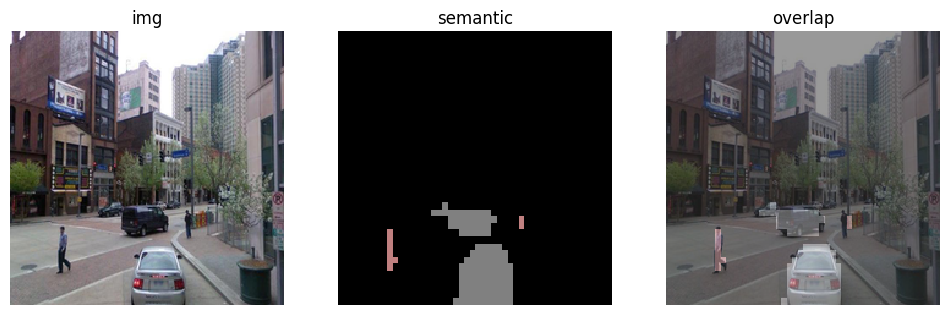

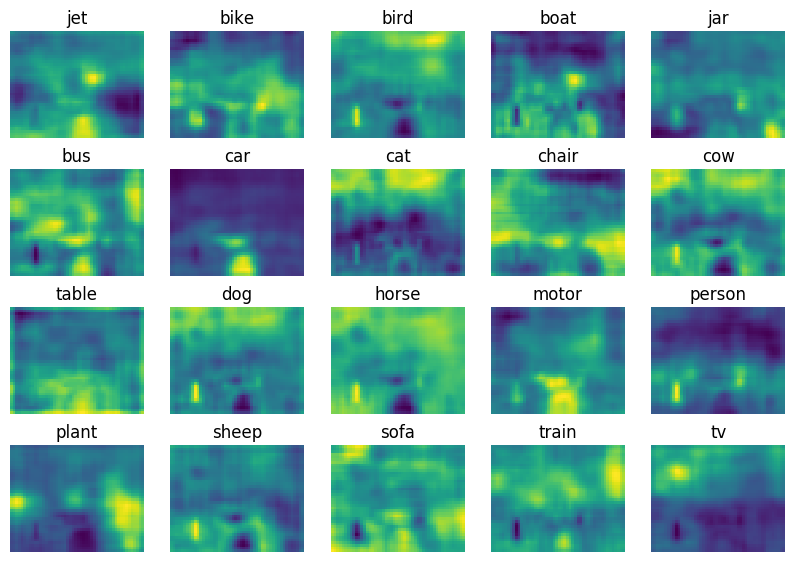

(21, 40, 50) float32 -4.277833 14.303225


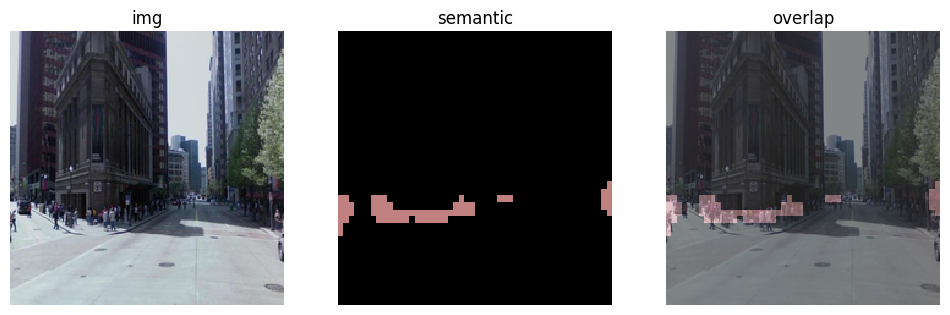

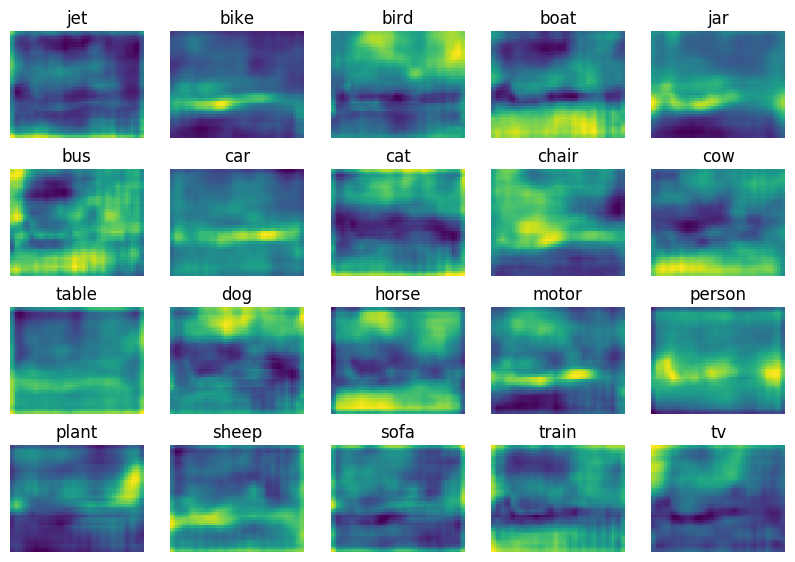

In [5]:
root = '/media/james/MyPassport/James/dataset/Localization/Pittsburgh/'
def plot_seg(example):
    logits = fp_h5[example][()]
    print(logits.shape, logits.dtype, logits.min(), logits.max())
    pred = np.argmax(logits,axis=0).astype(np.uint8)

    img = Image.open(os.path.join(root, example)).resize((224, 224),Image.ANTIALIAS)
    img_np = np.array(img).astype(np.float32)/255
    color_map = label_colors[pred].astype(np.uint8)
    rgb = Image.fromarray(color_map).resize((224, 224))
    rgb_np = np.array(rgb).astype(np.float32)/255

    overlap = np.clip(img_np * 0.5 + rgb_np * 0.5 + 0.1,0,1)

    fig = plt.figure(figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')
    sub_plot(fig,1,3,1,'img',img_np)
    sub_plot(fig,1,3,2,'semantic',rgb_np)
    sub_plot(fig,1,3,3,'overlap',overlap)
    plt.show(block=False)

    logits_norm = norm_01(logits)
    fig = plt.figure(figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')
    for i in range(1,21):
        sub_plot(fig,4,5,i,labels_names[i],logits_norm[i])
    plt.show()

plot_seg('000/000426_pitch1_yaw1.jpg')
plot_seg('001/001016_pitch1_yaw1.jpg')